In [3]:
# importation des packages
import requests
import pandas as pd
from bs4 import BeautifulSoup
from urllib.parse import urljoin
from skimage import transform,io,data
from skimage.io import imsave
import matplotlib.pyplot as plt
from PIL import Image,ImageTk
from io import BytesIO
import imageio
import os
from dotenv import load_dotenv
load_dotenv()
api_bamis=os.getenv('API_BAMIS')

None
<Response [200]>


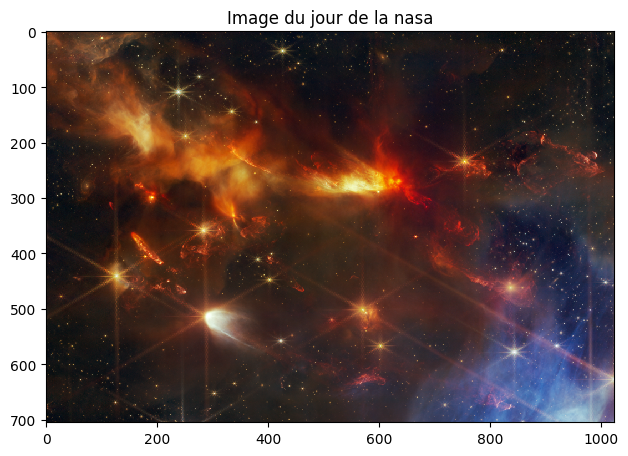

In [34]:
# affichage de l'image du jour
def showing_day_image(API_KEY):
                
    with requests.Session() as session:
            try:
               # lien de la page
                url="https://apod.nasa.gov/apod/astropix.html"
                # chemin d'enregistrement de l'image
                path="images/"
                # requete d'obtention des information du site
                response = session.get(url, params={'api_key':API_KEY})
                print(response.raise_for_status())
                
                # analyse du contenue de la requete
                soup = BeautifulSoup(response.text,'html.parser')
                # recherche du lien de l'image
                link_img_day=soup.select_one('img').get('src')
                
                # creation du lien du telechargement de l'image
                path_img=urljoin(url,link_img_day)
                
                # telechargement de li'image
                fileimage= session.get(path_img, params={'api_key':API_KEY})
                print(fileimage)
                # creation du nom de l'image en le nom qui se trouve dans l'url
                paths=path+link_img_day.split('/')[2]
                
                # ouvertur et transformation en byte de l'image
                image = Image.open(BytesIO(fileimage.content))
                # enregistrement de l'image
                image.save(paths)
                # affichage de l'image
                io.imshow(paths)
                plt.title('Image du jour de la nasa')
            except requests.exceptions.HTTPError as errh:
                print ('HTTP error',errh)

showing_day_image(api_bamis)

https://apod.nasa.gov/apod/image/2403/AntarcticEclipse_bruenjes_960.jpg
<Response [200]>


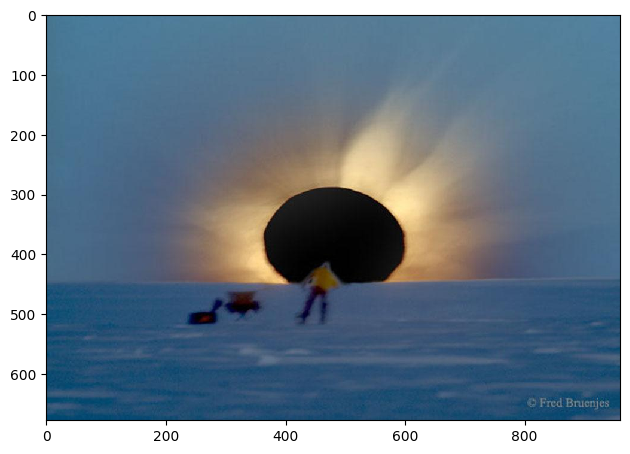

In [43]:
# fonction d'affiche image en une date donnée
def search_image_date(API,date_day):
    with requests.Session() as session:
            try:
                url= "https://api.nasa.gov/planetary/apod"
        
                #parametres de la requette
                
                params = {
                    'api_key':API ,
                    'date': date_day 
                    }
                path="E:/exerces G-6/AED/Cours_pro/images_scraping/"
                
                url_image = session.get(url, params=params).json().get('hdurl')
                print(url_image)
                name_image=url_image.split('/')[-1]
                
                file_image = session.get(url_image, params=params)
                print(file_image)
                image = Image.open(BytesIO(file_image.content))
                paths="images/"
                image.save(paths+name_image)
                io.imshow(paths+name_image)
            except requests.exceptions.HTTPError as errh:
                print ('HTTP error',errh)

search_image_date(api_bamis,"2024-03-10")   

In [42]:
# recherche des astroide de la nasa
def get_all_astroides(API_KEY,start_date,end_date):
             
    with requests.Session() as session:   
        url="https://api.nasa.gov/neo/rest/v1/feed"
        parameters= {
            'api_key': API_KEY,
            'start_date': start_date,  
            'end_date': end_date
            }
        response = session.get(url, params=parameters)
        astroides=response.json()
        
        all_astroides={"id_astroides":[],
                       "name":[],
                       "magnitude_absolue":[],
                       "diametre_min":[],
                       "vitesse_relatives(km/s)":[]
                      }
        for dates in astroides.get('near_earth_objects').keys():
            n_astroid=0
            for astroide in astroides.get('near_earth_objects')[dates]:
                n_astroid +=1
                all_astroides.get("id_astroides").append(astroide.get('id'))
                all_astroides.get("name").append(astroide.get('name'))
                all_astroides.get("magnitude_absolue").append(astroide.get('absolute_magnitude_h'))
                all_astroides.get("diametre_min").append(astroide.get('estimated_diameter').get('kilometers').get('estimated_diameter_min'))
                all_astroides.get("vitesse_relatives(km/s)").append(astroide.get('close_approach_data')[0].get('relative_velocity').get('kilometers_per_second'))
                print("N°: ",n_astroid)
                print(f" id : {astroide.get('id')} \n nom : {astroide.get('name')} \n magnitude absolue:  {astroide.get('absolute_magnitude_h')}")
                print('diameter_min :',astroide.get('estimated_diameter').get('kilometers').get('estimated_diameter_min'),'Km')
                print('Vitesse relatives :',astroide.get('close_approach_data')[0].get('relative_velocity').get('kilometers_per_second'),'Km/s')
                print('**'*50) 
                data=pd.DataFrame(all_astroides)
                data.to_csv('astroides_dataset.csv')
        return data
get_all_astroides(api_bamis,'2024-06-20','2024-06-25')

N°:  1
 id : 2533990 
 nom : 533990 (2014 QX266) 
 magnitude absolue:  22.39
diameter_min : 0.0884209093 Km
Vitesse relatives : 8.606440045 Km/s
****************************************************************************************************
N°:  2
 id : 3423023 
 nom : (2008 PE1) 
 magnitude absolue:  24.1
diameter_min : 0.040230458 Km
Vitesse relatives : 12.7362860094 Km/s
****************************************************************************************************
N°:  3
 id : 3428698 
 nom : (2008 TD) 
 magnitude absolue:  25.4
diameter_min : 0.022108281 Km
Vitesse relatives : 10.4286852945 Km/s
****************************************************************************************************
N°:  4
 id : 3740499 
 nom : (2016 AK193) 
 magnitude absolue:  22.08
diameter_min : 0.1019893859 Km
Vitesse relatives : 15.7233221419 Km/s
****************************************************************************************************
N°:  5
 id : 3785931 
 nom : (2017 TA6) 

,id_astroides,name,magnitude_absolue,diametre_min,vitesse_relatives(km/s)
0,2533990,533990 (2014 QX266),22.390,0.088421,8.606440045
1,3423023,(2008 PE1),24.100,0.040230,12.7362860094
2,3428698,(2008 TD),25.400,0.022108,10.4286852945
3,3740499,(2016 AK193),22.080,0.101989,15.7233221419
4,3785931,(2017 TA6),27.100,0.010105,5.5976151155
...,...,...,...,...,...
66,3879225,(2019 UD),26.940,0.010878,3.7044039476
67,54017201,(2020 JP3),24.600,0.031956,1.9065572334
68,2612509,612509 (2002 UK11),21.890,0.111315,28.4003765731
69,54445579,(2024 KF2),21.881,0.111778,18.5984164295


IndentationError: unindent does not match any outer indentation level (<string>, line 9)